## <center>Multi Linear Regression

#### Importing the pandas as pd 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data=pd.read_csv('./Medical_Cost.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.shape

(1338, 7)

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.duplicated().sum()

1

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

## Explaratory data analysis
### Univariate analysis
#### Histogram

In [11]:
columns1=['age','bmi','children','charges']

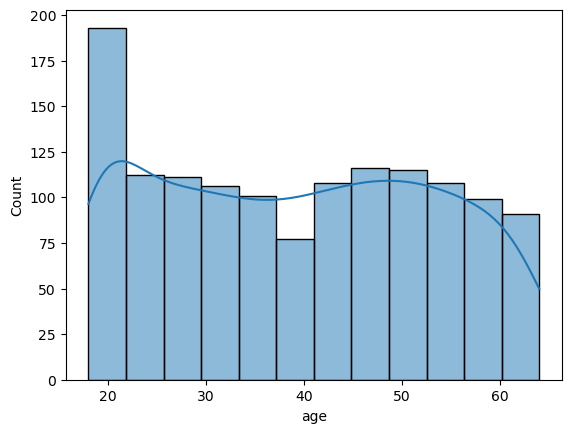

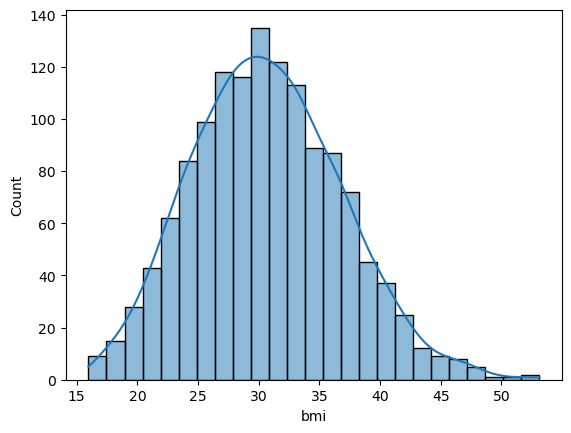

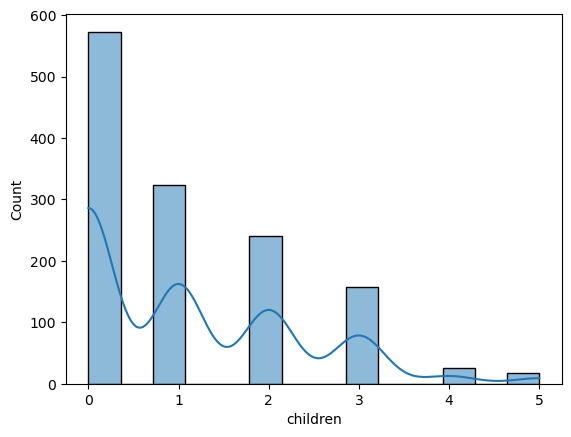

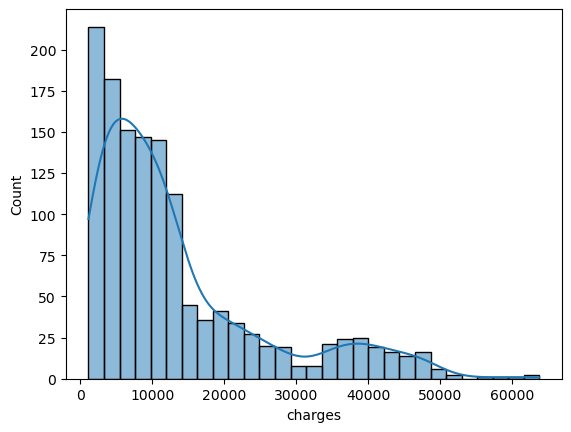

In [12]:
for i in columns1:
    sns.histplot(x=data[i],kde=True)
    plt.show()

#### Box plot

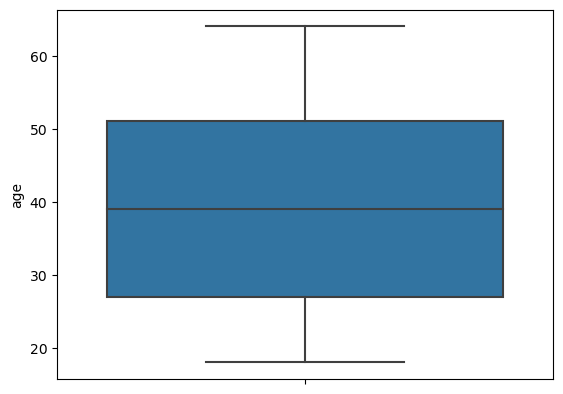

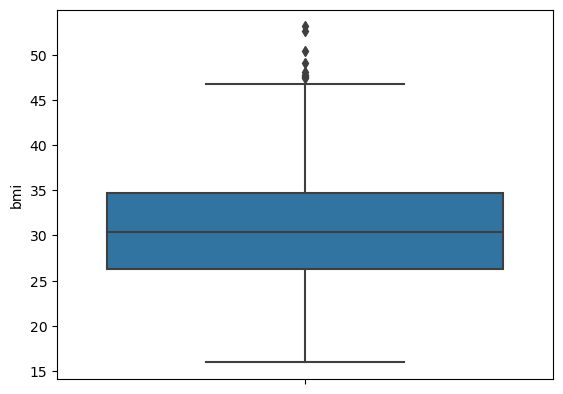

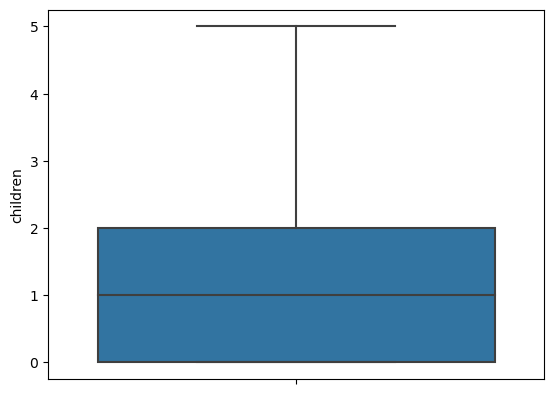

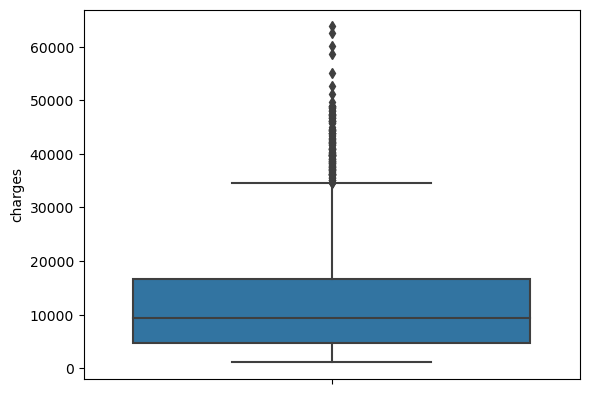

In [13]:
for i in columns1:
    sns.boxplot(y=data[i])
    plt.show()

#### There are two outliers(bmi,charges)

In [14]:
def outlier_limit(colm):
    Q3,Q1 = np.nanpercentile(colm,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [15]:
UL,LL = outlier_limit(data['bmi'])
data['bmi']= np.where((data['bmi']>UL)|(data['bmi']<LL),np.nan,data['bmi'])

In [16]:
UL,LL = outlier_limit(data['charges'])
data['charges'] = np.where((data['charges']>UL)|(data['charges']<LL),np.nan,data['charges'])

#### Checking the nan values

In [17]:
data.isnull().sum()

age           0
sex           0
bmi           9
children      0
smoker        0
region        0
charges     139
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Multivariate analysis
#### Scatter plot

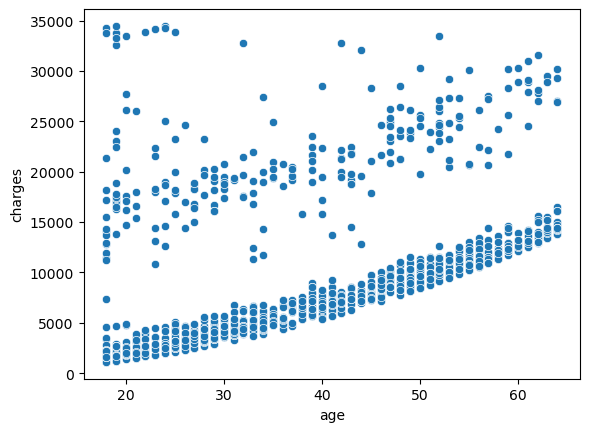

In [20]:
sns.scatterplot(data=data,x='age',y='charges')
plt.show()

#### Heat map

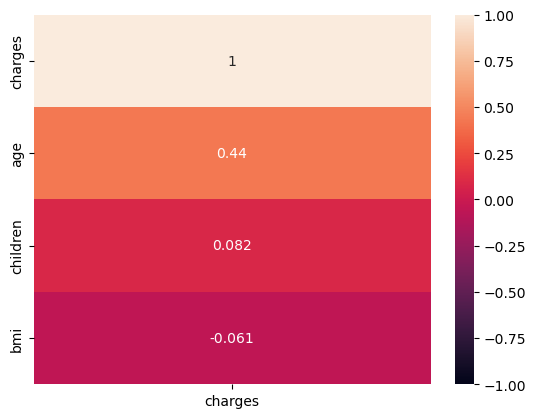

In [21]:
sns.heatmap(data.corr()[['charges']].sort_values(by='charges',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

#### Label encoder

In [22]:
le = LabelEncoder()

In [23]:
data['sex'] = le.fit_transform(data.sex)
data['smoker'] = le.fit_transform(data.smoker)
data['region'] = le.fit_transform(data.region)

In [24]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#### Selecting features and Targets

In [25]:
data = data[['age','charges']]
data.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


In [26]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Feature scaling
#### Initialising Standard Scaler

In [27]:
sc = StandardScaler()

In [28]:
x = sc.fit_transform(x)

#### Splitting the data into training and testing sets

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Model building
#### Creating dictionary of models for iterative purpose

In [30]:
models = {'LinearRgrassion':LinearRegression(),
         'Ridge':Ridge(),
         'Lasso':Lasso(),
         'LinearSVR':LinearSVR(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'GradientBoostingRegressor':GradientBoostingRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor(),
         'RandomForestRegressor':RandomForestRegressor(random_state=0)}

In [36]:
models

{'LinearRgrassion': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'LinearSVR': LinearSVR(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'GradientBoostingRegressor': GradientBoostingRegressor(),
 'AdaBoostRegressor': AdaBoostRegressor(),
 'RandomForestRegressor': RandomForestRegressor(random_state=0)}

#### Using a for loop for model training and testing

In [35]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score = r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rmse = np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print("*"*100)  

model trained with LinearRgrassion
r2score: 23.0458098091733
training_score: 17.51317177949564
testing_score: 23.0458098091733
mae: 5116.585712158249
mse: 44836795.70914781
rmse_test: 6696.02835337096
****************************************************************************************************
model trained with Ridge
r2score: 23.036330698970087
training_score: 17.51315263287313
testing_score: 23.036330698970087
mae: 5116.7789570392215
mse: 44842318.64333284
rmse_test: 6696.440744405407
****************************************************************************************************
model trained with Lasso
r2score: 23.04278234487076
training_score: 17.513169821794637
testing_score: 23.04278234487076
mae: 5116.64750456249
mse: 44838559.63906655
rmse_test: 6696.160066714844
****************************************************************************************************
model trained with LinearSVR
r2score: -159.6786471250586
training_score: -153.17626276789616
testing_scor

In [39]:
print('----'*40)

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [40]:
name = 150

In [41]:
print('model trained with {}'.format(name))

model trained with 150


In [42]:
print(f'model trained with {name}')

model trained with 150
